In [1]:
import numpy as np
from IPython.display import SVG

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import theano as th
import theano.tensor as tht
import theano.printing as thp
import theano.d3printing as d3p

Couldn't import dot_parser, loading of dot files will not be possible.


# Example 1

In [35]:
x, y, z = tht.scalars('xyz')
e = x + y * z
o = th.OpFromGraph([x, y, z], [e])
e2 = o(x, y, z) + o(z, y, y)
f = th.function([x, y, z], [e2])

In [36]:
topo = f.maker.fgraph.toposort()

In [38]:
of = topo[0]

In [46]:
fo = of.op.fn

In [47]:
gf = d3p.GraphFormatter()
g = gf.to_pydot(fo)

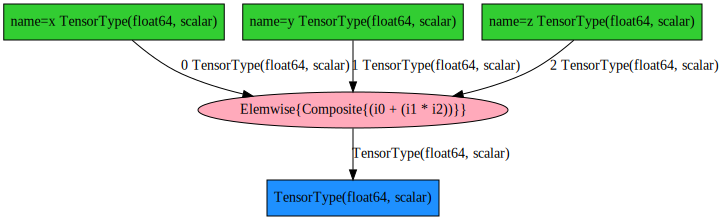

In [48]:
SVG(g.create_svg())

# Example 2 

In [4]:
x, y, z = tht.scalars('xyz')
e = x * y
o = th.OpFromGraph([x, y], [e])
e2 = o(x, y) + z
o2 = th.OpFromGraph([x, y, z], [e2])
e3 = o2(x, y, z) + z
f = th.function([x, y, z], [e3])

In [11]:
topo = f.maker.fgraph.toposort()

In [14]:
of = topo[0]

In [29]:
ofo = of.op

In [32]:
gf = d3p.GraphFormatter()

In [33]:
g = gf.to_pydot(ofo.fn.maker.fgraph)

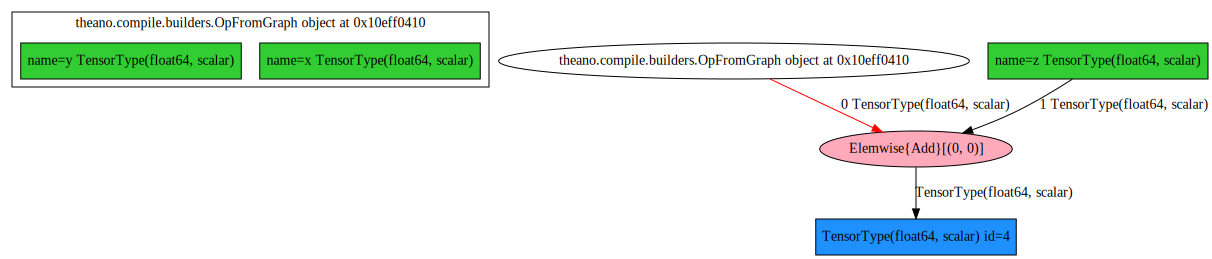

In [34]:
SVG(g.create_svg())